***1. Import Dependencies***

In [27]:
import numpy as np  # Import NumPy for numerical operations and array manipulation
import pandas as pd  # Import Pandas for data manipulation and analysis
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.svm import SVC  # Import Support Vector Classifier model
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors model
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier model
from sklearn.metrics import accuracy_score  # Import function to calculate accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, mutual_info_classif

***Load the dataset***

In [28]:
# Load the dataset into a Pandas DataFrame
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)

***3. Inspect the Dataset***

In [29]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
sonar_data.head()

First few rows of the dataset:


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [30]:
# Check the number of columns and presence of any missing values
print("Dataset dimensions (rows, columns):", sonar_data.shape)
print("\nMissing values in each column:\n", sonar_data.isnull().sum())

Dataset dimensions (rows, columns): (208, 61)

Missing values in each column:
 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


***# 4. Statistical Summary of Dataset***

In [31]:
# Check the distribution of labels (last column)
print("Class distribution:\n", sonar_data[60].value_counts(normalize=True))
# Check the distribution of labels (last column)
print("\nClass distribution:")
print(sonar_data[60].value_counts())

Class distribution:
 60
M    0.533654
R    0.466346
Name: proportion, dtype: float64

Class distribution:
60
M    111
R     97
Name: count, dtype: int64


In [32]:
# Get statistical measures of the data to understand its distribution
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


***5. Separate Features and Labels (after inspection)***

In [33]:
# After confirming the structure, separate features and label
X = sonar_data.drop(columns=60, axis=1)  # Remove the column with index 60 for features
Y = sonar_data[60]  # Select the column with index 60 as the label

In [34]:
# Display the features to verify separation
print("Features shape:", X.shape)
X

Features shape: (208, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [35]:
# Display the labels to verify separation
print("Features shape:", Y.shape)
Y

Features shape: (208,)


,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


***6. Add Gaussian Noise to the Features (Data Augmentation)***

In [36]:
def add_gaussian_noise(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)  # Generate Gaussian noise
    return data + noise  # Add noise to the original data

# Create a noisy version of the features
X_noisy = add_gaussian_noise(X)

# Combine original and noisy features
X_augmented = pd.concat([X, X_noisy], axis=0)
Y_augmented = pd.concat([Y, Y], axis=0)

print("Original and augmented data shapes:")
print("X_augmented shape:", X_augmented.shape)
print("Y_augmented shape:", Y_augmented.shape)

Original and augmented data shapes:
X_augmented shape: (416, 60)
Y_augmented shape: (416,)


***7. Class Distribution Analysis (mean values grouped by labels)***

In [37]:
# Group by the target column (60) and get the mean of each group to analyze data distribution
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


***8. Exploratory Data Analysis (EDA)***

***8.1 Data Distribution (Histograms)***

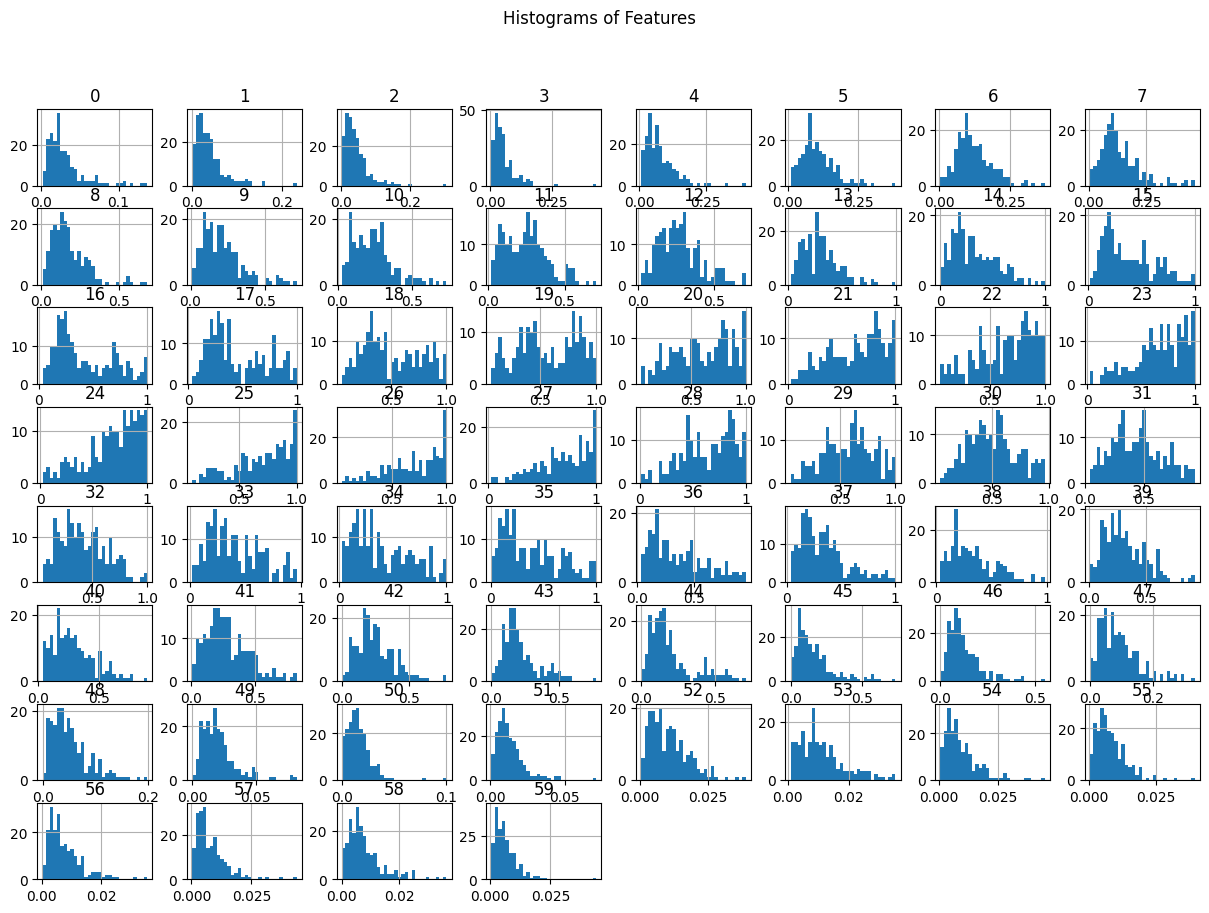

In [38]:
# Histogram for each feature - Histograms show the distribution of each feature and help identify patterns or anomalies.
X.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

***8.2 Boxplot for Outliers***

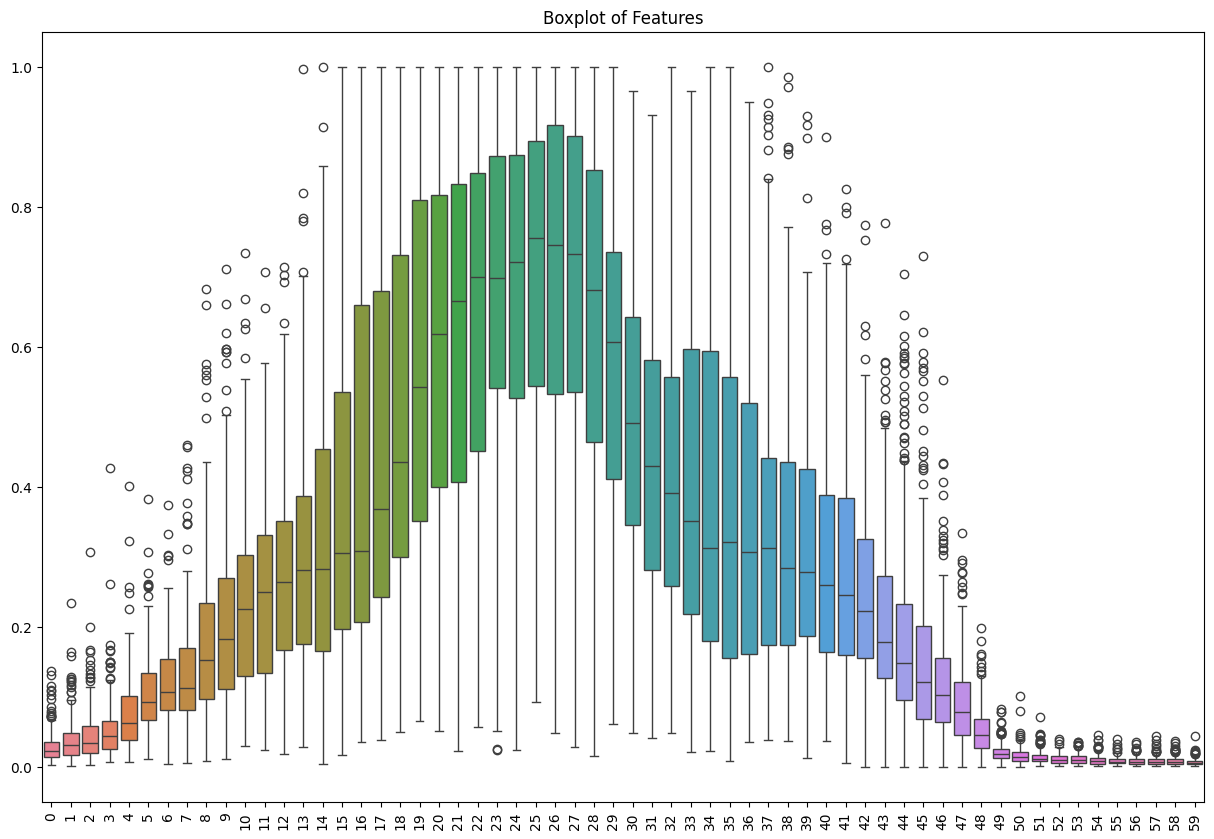

In [39]:
# Boxplot to check for outliers - Boxplots help identify outliers in features, which can be important for model accuracy.
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

***8.3 Correlation Matrix***

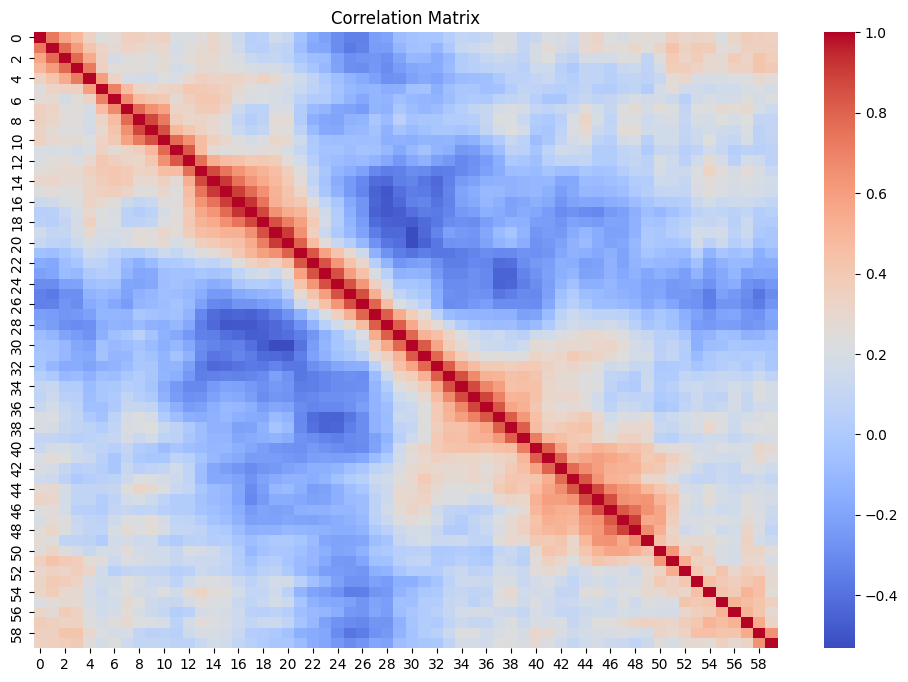

In [40]:
# Calculate correlation only on numeric features
correlation_matrix = X.corr()
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***8.4 Outlier Detection (Z-score)***

Identifying outliers can be useful, especially if they are affecting model quality.

In [41]:
from scipy import stats

z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers per feature:\n", outliers)

Number of outliers per feature:
 0     6
1     3
2     4
3     2
4     4
5     2
6     2
7     5
8     6
9     3
10    3
11    1
12    2
13    2
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    2
39    3
40    1
41    3
42    2
43    1
44    1
45    6
46    5
47    3
48    3
49    5
50    2
51    5
52    2
53    3
54    3
55    3
56    3
57    4
58    3
59    3
dtype: int64


***9. Dimensionality Reduction (PCA for Visualization)***

Reducing dimensionality and visualizing classes can help understand how classes are separated in feature space.


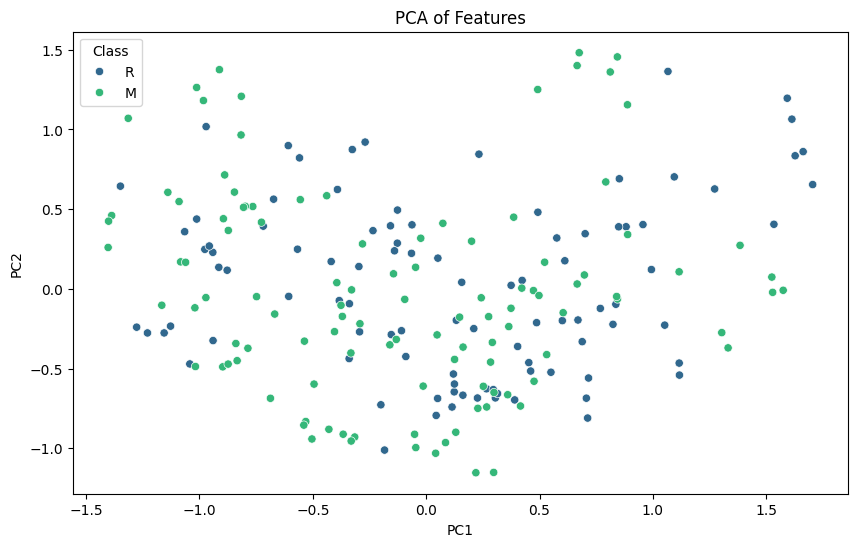

In [42]:
# Principal Component Analysis
from sklearn.decomposition import PCA
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Create a DataFrame for the PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = Y.values
# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis')
plt.title('PCA of Features')
plt.show()


***Incorporating a Scaler and a Selector***

In this project, the use of a scaler (StandardScaler) was considered based on the types of models being evaluated. Scaling the data proved beneficial for algorithms that rely on distance metrics or make assumptions about the distribution of the data, such as K-Nearest Neighbors (KNN) and Naive Bayes. These models demonstrated noticeable performance improvements with scaling, particularly in terms of precision and recall. On the other hand, models such as Support Vector Classifier (SVC), Random Forest, and Gradient Boosting showed excellent performance both with and without scaling, as they are less sensitive to feature magnitudes.

Given these findings, the decision to use a scaler depends on the selection of models. If focusing on KNN or Naive Bayes, applying a scaler is recommended to optimize results. However, for models like SVC, Random Forest, or Boosting algorithms, the scaler may not be necessary, as these algorithms already perform robustly without it. Therefore, scaling will be applied selectively depending on the models being prioritized.

In [24]:
'''# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_augmented)

# Feature selection
selector = SelectKBest(mutual_info_classif, k=20)
X_selected = selector.fit_transform(X_scaled, Y_augmented)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y_augmented, test_size=0.25, stratify=Y_augmented, random_state=1)'''


'# Feature scaling\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_augmented)\n\n# Feature selection\nselector = SelectKBest(mutual_info_classif, k=20)\nX_selected = selector.fit_transform(X_scaled, Y_augmented)\n\n# Split data\nX_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y_augmented, test_size=0.25, stratify=Y_augmented, random_state=1)'

***10. Split Data into Training and Test Sets***


**Training and Test data**

In [43]:
# Split the dataset into training and test sets, 25% of the data is used for testing, and the rest for training - without augmented data
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=1)

#Split Data into Training and Test Sets (with augmented data)
X_train, X_test, Y_train, Y_test = train_test_split(X_augmented, Y_augmented, test_size=0.25, stratify=Y_augmented, random_state=1)


In [44]:
# Display the shapes of the datasets to confirm the split
print("Training set dimensions (X_train):", X_train.shape)
print("Test set dimensions (X_test):", X_test.shape)

Training set dimensions (X_train): (312, 60)
Test set dimensions (X_test): (104, 60)


In [45]:
# Display the shapes of the datasets to confirm the split
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (312, 60) (104, 60)


In [46]:
print(Y.shape, Y_train.shape, Y_test.shape)

(208,) (312,) (104,)


In [47]:
# Display the training features and labels for inspection
print(X_train)
print(Y_train)

           0         1         2         3         4         5         6   \
95   0.029100  0.040000  0.077100  0.080900  0.052100  0.105100  0.014500   
13   0.009000  0.006200  0.025300  0.048900  0.119700  0.158900  0.139200   
139  0.012577  0.082506  0.093208  0.078548  0.019845  0.091992  0.128275   
194  0.039200  0.010800  0.026700  0.025700  0.041000  0.049100  0.105300   
78   0.023100  0.035100  0.003000  0.030400  0.033900  0.086000  0.173800   
..        ...       ...       ...       ...       ...       ...       ...   
75   0.020278 -0.006054  0.042015  0.023645  0.078571  0.137398  0.125603   
150  0.020900  0.027800  0.011500  0.044500  0.042700  0.076600  0.145800   
151  0.012004  0.033405  0.007173  0.007361  0.054640 -0.004437  0.025012   
125  0.022800  0.085300  0.100000  0.042800  0.111700  0.165100  0.159700   
156  0.011733  0.001939 -0.002204  0.058416  0.066838  0.123569  0.158312   

           7         8         9   ...        50        51        52  \
95 

**Multiple Model Evaluations**

In [48]:
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
]

In [49]:
# Modelos e seus parâmetros
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'SVC': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}),
    'GaussianNB': (GaussianNB(), {}),
    #'MultinomialNB': (MultinomialNB(), {}), # comment because do not accept negative value from augumetation
    'BernoulliNB': (BernoulliNB(), {}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'AdaBoostClassifier': (AdaBoostClassifier(), {'n_estimators': [50, 100]}),
    'ExtraTreesClassifier': (ExtraTreesClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]})
}

In [50]:
# Definindo o melhor modelo e a melhor precisão
best_model = None
best_accuracy_test = 0
best_model_name = ""

# Função para comparar os modelos
def compare_models():
    global best_model, best_accuracy_test, best_model_name

    # Usar StratifiedKFold para garantir a estratificação nos folds
    stratified_kfold = StratifiedKFold(n_splits=5)

    for model_name, (model, params) in models.items():
        print(f"Evaluating {model_name}...")

        # GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, params, cv=stratified_kfold, scoring='accuracy')
        grid_search.fit(X_train, Y_train)

        # Melhor combinação de parâmetros e melhor score de validação
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation accuracy for {model_name}: {best_score}")

        # Treinar e avaliar o modelo com os melhores parâmetros
        best_model_instance = grid_search.best_estimator_

        # Predições e precisão no conjunto de treino
        train_data_prediction = best_model_instance.predict(X_train)
        accuracy_train = accuracy_score(Y_train, train_data_prediction)

        # Predições e precisão no conjunto de teste
        test_data_prediction = best_model_instance.predict(X_test)
        accuracy_test = accuracy_score(Y_test, test_data_prediction)

        # Cálculo das métricas Precision, Recall, F1-Score no test set
        precision = precision_score(Y_test, test_data_prediction, pos_label='R')
        recall = recall_score(Y_test, test_data_prediction, pos_label='R')
        f1 = f1_score(Y_test, test_data_prediction, pos_label='R')

        # Atualizar o melhor modelo baseado na precisão do teste
        if accuracy_test > best_accuracy_test:
            best_accuracy_test = accuracy_test
            best_model = best_model_instance
            best_model_name = model_name
        '''
       # Mostrar a matriz de confusão
        cm = confusion_matrix(Y_test, test_data_prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()
        '''
        # Mostrar ambas as precisões (treino e teste)
        print(f'Accuracy score for {model_name}: \nTraining: {accuracy_train} \nTest: {accuracy_test}\n')
        print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}\n')

    # Exibir o melhor modelo e sua precisão
    print(f"\nThe best model is: {best_model_name} with a test accuracy of {best_accuracy_test}")

# Chamar a função para comparar os modelos
compare_models()

Evaluating LogisticRegression...
Best parameters for LogisticRegression: {'C': 10}
Best cross-validation accuracy for LogisticRegression: 0.8077828981054788
Accuracy score for LogisticRegression: 
Training: 0.8589743589743589 
Test: 0.8653846153846154

Precision: 0.8723404255319149, Recall: 0.8367346938775511, F1-Score: 0.8541666666666667

Evaluating SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.951868919610855
Accuracy score for SVC: 
Training: 0.9967948717948718 
Test: 0.9807692307692307

Precision: 1.0, Recall: 0.9591836734693877, F1-Score: 0.9791666666666666

Evaluating KNeighborsClassifier...
Best parameters for KNeighborsClassifier: {'n_neighbors': 5}
Best cross-validation accuracy for KNeighborsClassifier: 0.8299539170506913
Accuracy score for KNeighborsClassifier: 
Training: 0.8878205128205128 
Test: 0.8557692307692307

Precision: 0.9047619047619048, Recall: 0.7755102040816326, F1-Score: 0.8351648351648353

Evaluating Rando

Making a Predictive System

In [52]:
# Define input data for prediction - Open the dataset and copy a line without the label
input_data = (0.0346, 0.0509, 0.0079, 0.0243, 0.0432, 0.0735, 0.0938, 0.1134, 0.1228, 0.1508,
              0.1809, 0.2390, 0.2947, 0.2866, 0.4010, 0.5325, 0.5486, 0.5823, 0.6041, 0.6749,
              0.7084, 0.7890, 0.9284, 0.9781, 0.9738, 1.0000, 0.9702, 0.9956, 0.8235, 0.6020,
              0.5342, 0.4867, 0.3526, 0.1566, 0.0946, 0.1613, 0.2824, 0.3390, 0.3019, 0.2945,
              0.2978, 0.2676, 0.2055, 0.2069, 0.1625, 0.1216, 0.1013, 0.0744, 0.0386, 0.0050,
              0.0146, 0.0040, 0.0122, 0.0107, 0.0112, 0.0102, 0.0052, 0.0024, 0.0079, 0.0031)

# Convert input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array to the format expected by the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# If scaling was applied
# Apply the same scaler (StandardScaler) used during training
# scaler = StandardScaler() # Only if scaler was used
# input_data_scaled = scaler.transform(input_data_reshaped)

# If feature selection was applied
# Apply the same selector (SelectKBest) used during training
# selector = SelectKBest(mutual_info_classif, k=20) # Only if SelectKBest was used
# input_data_selected = selector.transform(input_data_scaled)

# Make prediction with the best model
if best_model is not None:
    # If `SelectKBest` was used, you need to transform the input data
    # Assuming `selector` was fitted during training
    # prediction = best_model.predict(input_data_selected)

    # If `SelectKBest` was not used, you should use the original input data
    prediction = best_model.predict(input_data_reshaped)
    print(f"Prediction made using the best model ({best_model_name})")
    print(prediction)

    # Interpreting the prediction
    if prediction[0] == 'R':
        print('The object is a Rock')
    else:
        print('The object is a Mine')
else:
    print('No model available for prediction.')

Prediction made using the best model (ExtraTreesClassifier)
['M']
The object is a Mine


In [ ]:
# Done